# Implementation Analysis

In this notebook I take all implementation results and I analyze the time spent on each stage of the algorithm, the speedup and the scalability.


The dimension of file is fixed. Another study on the performance of program related the dimension of file is available in another notebook.

In [1]:
# File dimension
FILE_DIM='50'

# Files
SEQ_FILE_PATH=f'results/sequential_{FILE_DIM}.csv'
THR_FILE_PATH=f'results/thr_{FILE_DIM}.csv'
FF_FILE_PATH=f'results/ff_{FILE_DIM}.csv'

In [2]:
from b_tools.preprocess import get_standardized_measures

SEQ_DATA = get_standardized_measures(SEQ_FILE_PATH)
THR_DATA = get_standardized_measures(THR_FILE_PATH, excluded_columns=['P_DEGREE'])
FF_DATA = get_standardized_measures(FF_FILE_PATH, excluded_columns=['P_DEGREE'])

In [3]:
SEQ_DATA

,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,31250032,1024879424,174126,4455379636,14554811567,16632965,20083127750
1,31916841,1025410394,161422,4455676725,14643859643,56380779,20213405804
2,31120809,1025476674,168566,4449294358,14549473017,58827221,20114360645
3,31843203,1024832052,160180,4456399774,14097837064,58629621,19669701894
4,31353736,1024830054,169106,4451618549,14614035147,60700892,20182707484


In [4]:
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,31468541,802936020,155792,4762060813,14287979393,54400106,19939000665
1,1,33025738,798682958,155882,4668415038,14288963458,59562389,19848805463
2,1,32310648,803158411,157526,4765851633,14481733604,64450066,20147661888
3,1,31623080,805812692,154680,4666983356,14519845878,59828547,20084248233
4,1,32419723,805177809,158066,4754193922,14142983532,57011508,19791944560
...,...,...,...,...,...,...,...,...
295,60,32540017,24179953,166241,564523031,391505909,27868194,1040783345
296,60,32892758,23967044,165971,523850979,376834261,24669721,982380734
297,60,32247289,23900709,157786,579921692,392721978,28026680,1056976134
298,60,32639573,23912572,158647,512821684,385528831,24284599,979345906


In [5]:
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,34610566,803749292,159579,4816399014,13967123572,50317674,19672359697
1,1,31305323,808927071,155862,4763104508,14252019414,47110385,19902622563
2,1,32656404,796839574,162124,4661885502,14502833241,48003349,20042380194
3,1,31628989,782113503,161192,4804230793,14146317669,48826410,19813278556
4,1,31544551,782665286,154951,4663559690,14509422433,50073937,20037420848
...,...,...,...,...,...,...,...,...
295,60,32849306,23952917,165250,519449833,384251961,31586108,992255375
296,60,29417926,24275662,167664,524297545,378432559,24687183,981278539
297,60,33128098,24101246,162855,572689772,391744308,28248236,1050074515
298,60,33220751,23904847,164719,523043736,385609565,24231770,990175388


## Remove outliers

Remove outliers by taking the median and compute the mean for each steps of the algorithm.

In [6]:
SEQ_DATA = SEQ_DATA.median()
SEQ_DATA

READ         3.135374e+07
FREQCALC     1.024879e+09
HUFFBUILD    1.685660e+05
MAP          4.455380e+09
TRANSFORM    1.455481e+10
WRITE        5.862962e+07
TOTAL        2.011436e+10
dtype: float64

In [7]:
THR_DATA = THR_DATA.groupby('P_DEGREE', as_index=False).median()
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09


In [8]:
FF_DATA = FF_DATA.groupby('P_DEGREE', as_index=False).median()
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09


## Plotting Execution Time

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

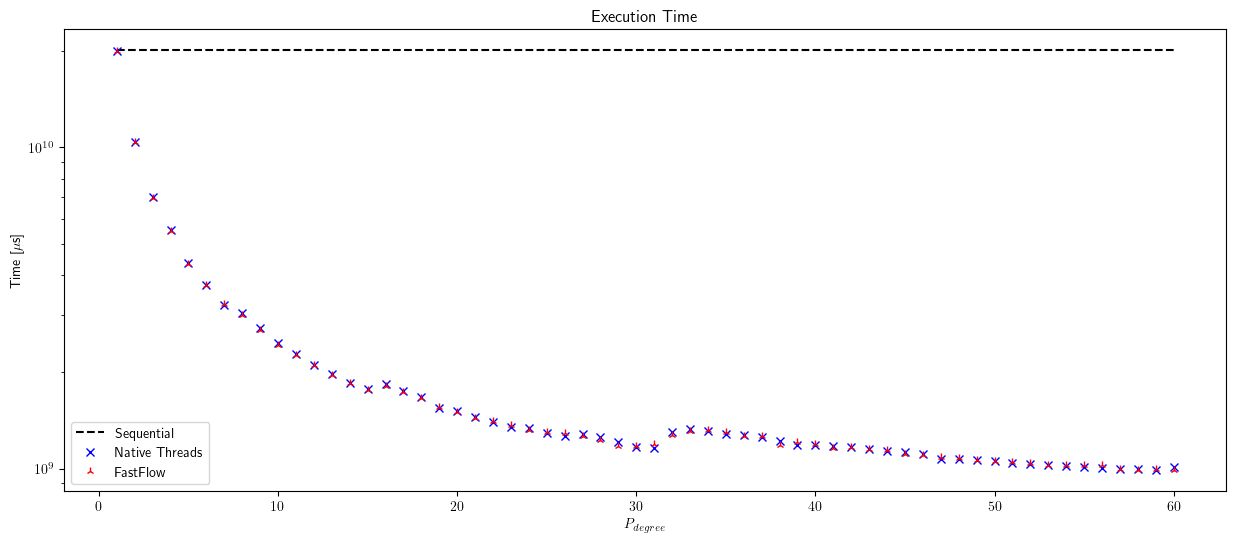

In [10]:
plt.figure(figsize=(15,6))
plt.title("Execution Time")

plt.ylabel("Time [$\mu$s]")
plt.xlabel("$P_{degree}$")
plt.yscale('log')

#plt.xticks([p _])

X = THR_DATA['P_DEGREE']

# Plot sequential implementation
plt.plot(X, [SEQ_DATA['TOTAL'] for _ in X], '--k', label='Sequential')

# Plot THR implementation
plt.plot(X, THR_DATA['TOTAL'], 'xb', label='Native Threads')

# Plot FF implementation
plt.plot(X, FF_DATA['TOTAL'], '2r', label='FastFlow')

plt.legend()


## Speedup with I/O

In [11]:
THR_DATA['SP_IO'] = SEQ_DATA['TOTAL'] / THR_DATA['TOTAL']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675


In [12]:
FF_DATA['SP_IO'] = SEQ_DATA['TOTAL'] / FF_DATA['TOTAL']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099


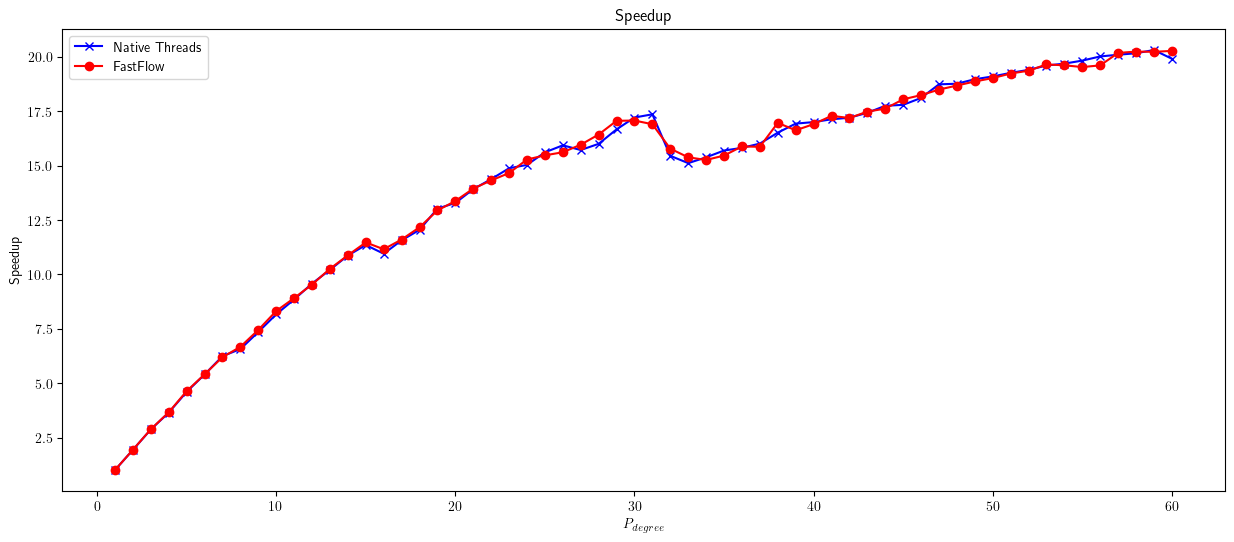

In [13]:
plt.figure(figsize=(15,6))
plt.title("Speedup")

plt.xlabel("$P_{degree}$")
plt.ylabel("Speedup")

# Plot THR
plt.plot(X, THR_DATA['SP_IO'], 'x-b', label="Native Threads")

# Plot FF
plt.plot(X, FF_DATA['SP_IO'], 'o-r', label="FastFlow")

plt.legend()

## Speedup without I/O

In [14]:
SEQ_IO_EXC = SEQ_DATA['FREQCALC'] + SEQ_DATA['HUFFBUILD'] + SEQ_DATA['MAP'] + SEQ_DATA['TRANSFORM']
SEQ_IO_EXC

20035239193.0

In [15]:
THR_DATA['TOTAL_-IO'] = THR_DATA['TOTAL'] - THR_DATA['READ'] - THR_DATA['WRITE']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795,1.984713e+10
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602,1.029728e+10
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920,6.910996e+09
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103,5.424555e+09
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627,4.283754e+09
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417,3.633345e+09
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465,3.130510e+09
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754,2.968573e+09
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058,2.644076e+09
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675,2.370169e+09


In [16]:
THR_DATA['SP_-IO'] = SEQ_IO_EXC / THR_DATA['TOTAL_-IO']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795,1.984713e+10,1.009478
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602,1.029728e+10,1.945683
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920,6.910996e+09,2.899038
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103,5.424555e+09,3.693435
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627,4.283754e+09,4.677029
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417,3.633345e+09,5.514269
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465,3.130510e+09,6.399993
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754,2.968573e+09,6.749113
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058,2.644076e+09,7.577407
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675,2.370169e+09,8.453084


In [17]:
FF_DATA['TOTAL_-IO'] = FF_DATA['TOTAL'] - FF_DATA['READ'] - FF_DATA['WRITE']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639,1.982217e+10
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832,1.029450e+10
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568,6.894219e+09
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743,5.412063e+09
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238,4.260033e+09
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036,3.640866e+09
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876,3.166693e+09
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599,2.932351e+09
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786,2.619322e+09
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099,2.339602e+09


In [18]:
FF_DATA['SP_-IO'] = SEQ_IO_EXC / FF_DATA['TOTAL_-IO']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639,1.982217e+10,1.010749
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832,1.029450e+10,1.946207
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568,6.894219e+09,2.906093
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743,5.412063e+09,3.701960
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238,4.260033e+09,4.703071
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036,3.640866e+09,5.502878
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876,3.166693e+09,6.326865
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599,2.932351e+09,6.832483
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786,2.619322e+09,7.649017
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099,2.339602e+09,8.563526


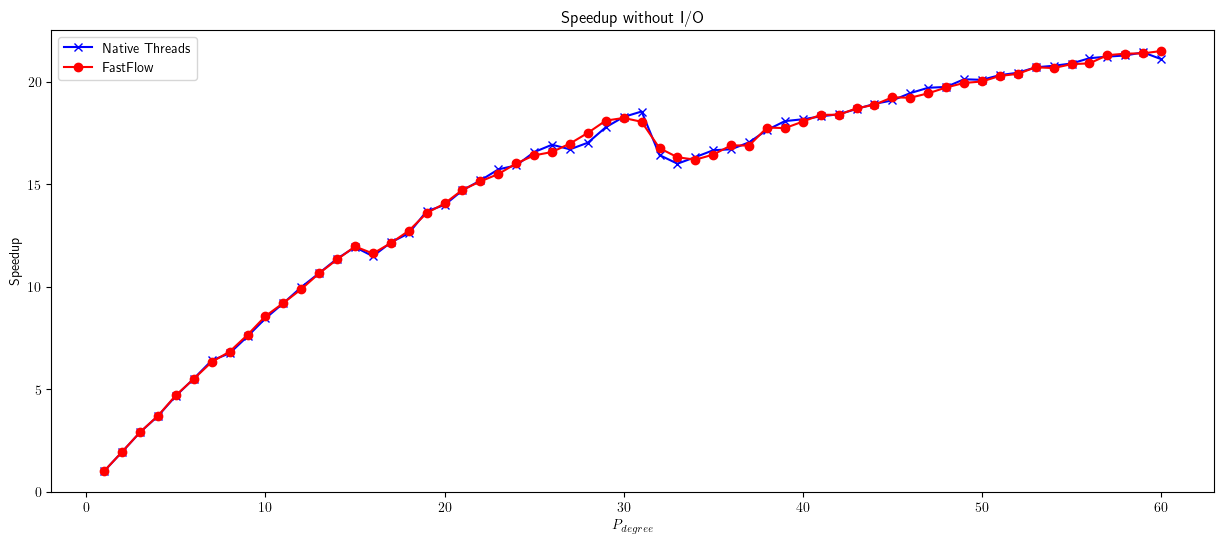

In [19]:
plt.figure(figsize=(15,6))
plt.title("Speedup without I/O")

plt.xlabel("$P_{degree}$")
plt.ylabel("Speedup")

# Plot THR
plt.plot(X, THR_DATA['SP_-IO'], 'x-b', label="Native Threads")
# Plot FastFlow
plt.plot(X, FF_DATA['SP_-IO'], 'o-r', label="FastFlow")

plt.legend()


## Scalability

In [20]:
THR_T1 = THR_DATA[THR_DATA['P_DEGREE'] == 1]['TOTAL'][0]
THR_T1

19939000665.0

In [21]:
THR_DATA['SC_IO'] = THR_T1 / THR_DATA['TOTAL']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795,1.984713e+10,1.009478,1.000000
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602,1.029728e+10,1.945683,1.919719
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920,6.910996e+09,2.899038,2.847873
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103,5.424555e+09,3.693435,3.615307
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627,4.283754e+09,4.677029,4.561509
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417,3.633345e+09,5.514269,5.352344
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465,3.130510e+09,6.399993,6.188043
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754,2.968573e+09,6.749113,6.510495
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058,2.644076e+09,7.577407,7.288952
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675,2.370169e+09,8.453084,8.094486


In [22]:
FF_T1 = FF_DATA[FF_DATA['P_DEGREE'] == 1]['TOTAL'][0]
FF_T1

19902622563.0

In [23]:
FF_DATA['SC_IO'] = FF_T1 / FF_DATA['TOTAL']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639,1.982217e+10,1.010749,1.000000
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832,1.029450e+10,1.946207,1.918422
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568,6.894219e+09,2.906093,2.853214
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743,5.412063e+09,3.701960,3.623197
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238,4.260033e+09,4.703071,4.586445
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036,3.640866e+09,5.502878,5.347149
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876,3.166693e+09,6.326865,6.131643
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599,2.932351e+09,6.832483,6.600380
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786,2.619322e+09,7.649017,7.370375
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099,2.339602e+09,8.563526,8.229547


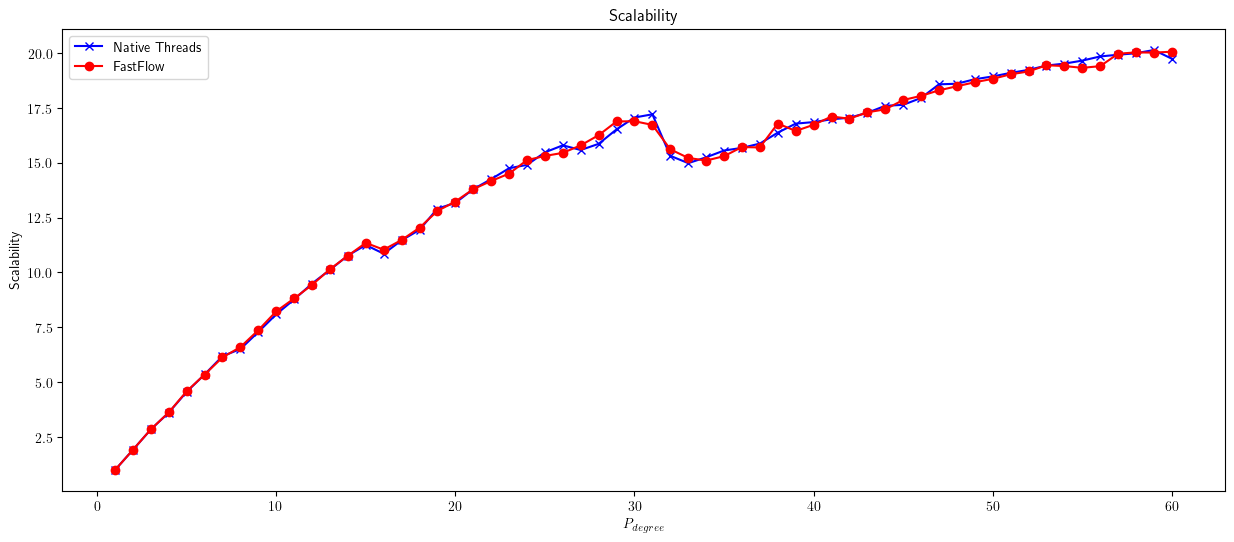

In [24]:
plt.figure(figsize=(15,6))
plt.title("Scalability")
plt.xlabel("$P_{degree}$")
plt.ylabel("Scalability")

# Plot THR
plt.plot(X, THR_DATA['SC_IO'], 'x-b', label="Native Threads")
# Plot FF
plt.plot(X, FF_DATA['SC_IO'], 'o-r', label="FastFlow")
plt.legend()

# Scalability without I/O

In [25]:
THR_T00 = THR_DATA[THR_DATA['P_DEGREE'] == 1]['TOTAL_-IO'][0]
THR_T00

19847127628.0

In [26]:
THR_DATA['SC_-IO'] = THR_T00 / THR_DATA['TOTAL_-IO']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795,1.984713e+10,1.009478,1.000000,1.000000
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602,1.029728e+10,1.945683,1.919719,1.927415
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920,6.910996e+09,2.899038,2.847873,2.871819
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103,5.424555e+09,3.693435,3.615307,3.658757
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627,4.283754e+09,4.677029,4.561509,4.633116
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417,3.633345e+09,5.514269,5.352344,5.462495
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465,3.130510e+09,6.399993,6.188043,6.339903
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754,2.968573e+09,6.749113,6.510495,6.685746
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058,2.644076e+09,7.577407,7.288952,7.506263
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675,2.370169e+09,8.453084,8.094486,8.373718


In [27]:
FF_T00 = FF_DATA[FF_DATA['P_DEGREE'] == 1]['TOTAL_-IO'][0]
FF_T00

19822167164.0

In [28]:
FF_DATA['SC_-IO'] = FF_T00 / FF_DATA['TOTAL_-IO']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639,1.982217e+10,1.010749,1.000000,1.000000
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832,1.029450e+10,1.946207,1.918422,1.925510
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568,6.894219e+09,2.906093,2.853214,2.875187
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743,5.412063e+09,3.701960,3.623197,3.662590
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238,4.260033e+09,4.703071,4.586445,4.653055
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036,3.640866e+09,5.502878,5.347149,5.444355
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876,3.166693e+09,6.326865,6.131643,6.259579
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599,2.932351e+09,6.832483,6.600380,6.759821
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786,2.619322e+09,7.649017,7.370375,7.567671
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099,2.339602e+09,8.563526,8.229547,8.472454


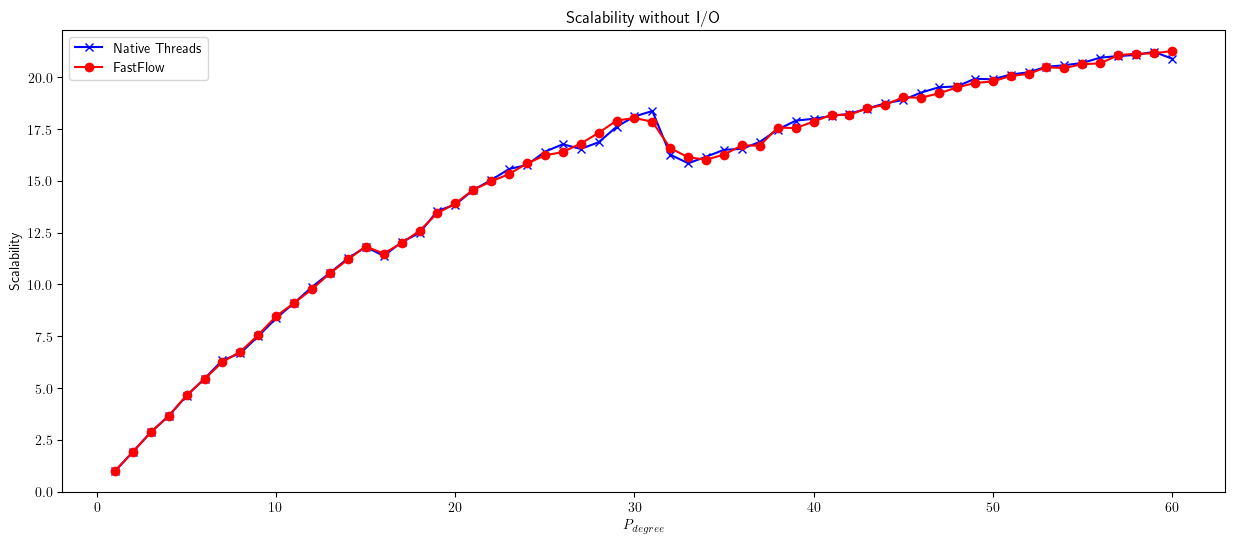

In [29]:
plt.figure(figsize=(15,6))
plt.title("Scalability without I/O")
plt.xlabel("$P_{degree}$")
plt.ylabel("Scalability")

# Plot THR
plt.plot(X, THR_DATA['SC_-IO'], 'x-b', label="Native Threads")
# Plot FF
plt.plot(X, FF_DATA['SC_-IO'], 'o-r', label="FastFlow")

plt.legend()

## Efficiency

In [30]:
THR_DATA['EFF_IO'] = THR_DATA['SP_IO'] / THR_DATA['P_DEGREE']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO,EFF_IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795,1.984713e+10,1.009478,1.000000,1.000000,1.008795
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602,1.029728e+10,1.945683,1.919719,1.927415,0.968301
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920,6.910996e+09,2.899038,2.847873,2.871819,0.957640
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103,5.424555e+09,3.693435,3.615307,3.658757,0.911776
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627,4.283754e+09,4.677029,4.561509,4.633116,0.920325
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417,3.633345e+09,5.514269,5.352344,5.462495,0.899903
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465,3.130510e+09,6.399993,6.188043,6.339903,0.891781
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754,2.968573e+09,6.749113,6.510495,6.685746,0.820969
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058,2.644076e+09,7.577407,7.288952,7.506263,0.817006
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675,2.370169e+09,8.453084,8.094486,8.373718,0.816568


In [31]:
THR_DATA['EFF_-IO'] = THR_DATA['SP_-IO'] / THR_DATA['P_DEGREE']
THR_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO,EFF_IO,EFF_-IO
0,1,32310648.0,803158411.0,155882.0,4.754194e+09,1.428896e+10,59562389.0,1.993900e+10,1.008795,1.984713e+10,1.009478,1.000000,1.000000,1.008795,1.009478
1,2,31071567.0,398791108.0,155231.0,2.570880e+09,7.227907e+09,58066766.0,1.038642e+10,1.936602,1.029728e+10,1.945683,1.919719,1.927415,0.968301,0.972841
2,3,31713349.0,265759703.0,165240.0,1.876189e+09,4.804573e+09,58655358.0,7.001365e+09,2.872920,6.910996e+09,2.899038,2.847873,2.871819,0.957640,0.966346
3,4,32335464.0,199518422.0,162695.0,1.611320e+09,3.610946e+09,58271589.0,5.515162e+09,3.647103,5.424555e+09,3.693435,3.615307,3.658757,0.911776,0.923359
4,5,31515348.0,157615521.0,163757.0,1.190470e+09,2.933055e+09,55871983.0,4.371141e+09,4.601627,4.283754e+09,4.677029,4.561509,4.633116,0.920325,0.935406
5,6,32342918.0,132675562.0,159949.0,1.031023e+09,2.462548e+09,59596351.0,3.725284e+09,5.399417,3.633345e+09,5.514269,5.352344,5.462495,0.899903,0.919045
6,7,33278281.0,113695481.0,164749.0,9.234387e+08,2.095397e+09,58394288.0,3.222182e+09,6.242465,3.130510e+09,6.399993,6.188043,6.339903,0.891781,0.914285
7,8,33937846.0,98439868.0,166241.0,9.826986e+08,1.803962e+09,60082411.0,3.062594e+09,6.567754,2.968573e+09,6.749113,6.510495,6.685746,0.820969,0.843639
8,9,32614667.0,89017575.0,162995.0,9.215537e+08,1.632738e+09,58819245.0,2.735510e+09,7.353058,2.644076e+09,7.577407,7.288952,7.506263,0.817006,0.841934
9,10,32839879.0,80368669.0,164378.0,7.888264e+08,1.472884e+09,60273009.0,2.463282e+09,8.165675,2.370169e+09,8.453084,8.094486,8.373718,0.816568,0.845308


In [32]:
FF_DATA['EFF_IO'] = FF_DATA['SP_IO'] / FF_DATA['P_DEGREE']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO,EFF_IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639,1.982217e+10,1.010749,1.000000,1.000000,1.010639
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832,1.029450e+10,1.946207,1.918422,1.925510,0.969416
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568,6.894219e+09,2.906093,2.853214,2.875187,0.961189
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743,5.412063e+09,3.701960,3.623197,3.662590,0.915436
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238,4.260033e+09,4.703071,4.586445,4.653055,0.927048
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036,3.640866e+09,5.502878,5.347149,5.444355,0.900673
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876,3.166693e+09,6.326865,6.131643,6.259579,0.885268
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599,2.932351e+09,6.832483,6.600380,6.759821,0.833825
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786,2.619322e+09,7.649017,7.370375,7.567671,0.827643
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099,2.339602e+09,8.563526,8.229547,8.472454,0.831710


In [33]:
FF_DATA['EFF_-IO'] = FF_DATA['SP_-IO'] / FF_DATA['P_DEGREE']
FF_DATA

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,SP_IO,TOTAL_-IO,SP_-IO,SC_IO,SC_-IO,EFF_IO,EFF_-IO
0,1,31628989.0,796839574.0,159579.0,4.763105e+09,1.425202e+10,48826410.0,1.990262e+10,1.010639,1.982217e+10,1.010749,1.000000,1.000000,1.010639,1.010749
1,2,31819206.0,399083114.0,154539.0,2.579516e+09,7.332672e+09,48151666.0,1.037447e+10,1.938832,1.029450e+10,1.946207,1.918422,1.925510,0.969416,0.973104
2,3,32633041.0,264742455.0,164278.0,1.845911e+09,4.807616e+09,48658535.0,6.975511e+09,2.883568,6.894219e+09,2.906093,2.853214,2.875187,0.961189,0.968698
3,4,31811772.0,198917687.0,164017.0,1.612065e+09,3.596503e+09,49235918.0,5.493111e+09,3.661743,5.412063e+09,3.701960,3.623197,3.662590,0.915436,0.925490
4,5,31686687.0,160972774.0,164418.0,1.188487e+09,2.904836e+09,47725176.0,4.339445e+09,4.635238,4.260033e+09,4.703071,4.586445,4.653055,0.927048,0.940614
5,6,31830297.0,132310333.0,162334.0,1.031412e+09,2.472134e+09,49403772.0,3.722100e+09,5.404036,3.640866e+09,5.502878,5.347149,5.444355,0.900673,0.917146
6,7,31608761.0,113426853.0,162364.0,9.276279e+08,2.118630e+09,47585234.0,3.245887e+09,6.196876,3.166693e+09,6.326865,6.131643,6.259579,0.885268,0.903838
7,8,32645383.0,100533817.0,162685.0,9.826282e+08,1.834617e+09,50378808.0,3.015375e+09,6.670599,2.932351e+09,6.832483,6.600380,6.759821,0.833825,0.854060
8,9,32975371.0,88404211.0,162084.0,9.004870e+08,1.641047e+09,48056868.0,2.700354e+09,7.448786,2.619322e+09,7.649017,7.370375,7.567671,0.827643,0.849891
9,10,31538450.0,79714811.0,161092.0,7.821357e+08,1.470904e+09,47294540.0,2.418435e+09,8.317099,2.339602e+09,8.563526,8.229547,8.472454,0.831710,0.856353


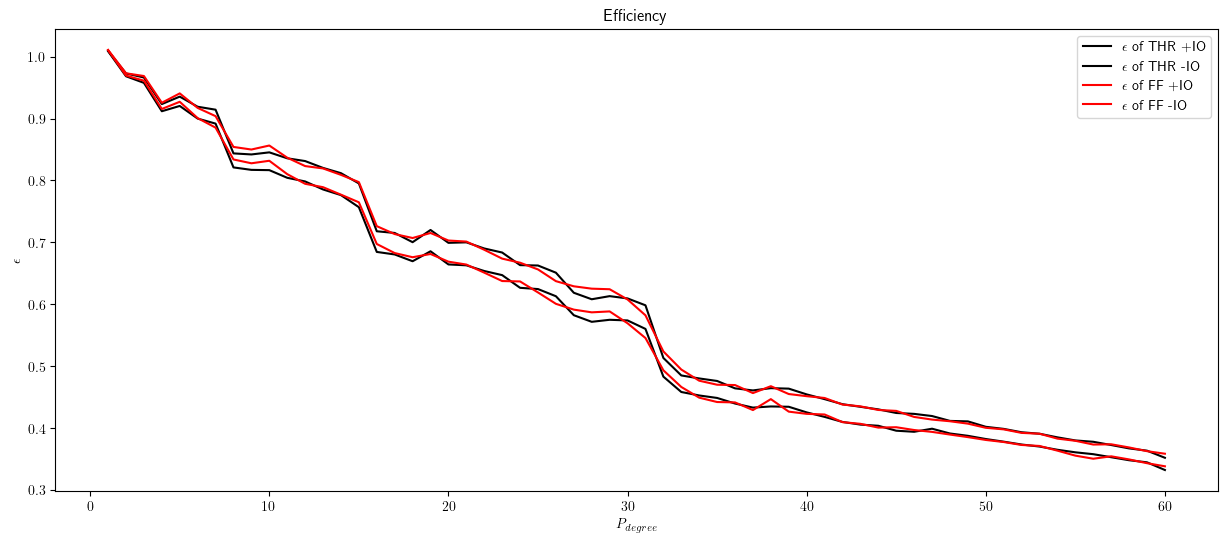

In [41]:
plt.figure(figsize=(15,6))
plt.title("Efficiency")
plt.xlabel("$P_{degree}$")
plt.ylabel("$\epsilon$")

# Plot THR
plt.plot(X, THR_DATA['EFF_IO'], 'k', label="$\epsilon$ of THR +IO")
plt.plot(X, THR_DATA['EFF_-IO'], 'k', label="$\epsilon$ of THR -IO")

# Plot FF
plt.plot(X, FF_DATA['EFF_IO'], 'r', label="$\epsilon$ of FF +IO")
plt.plot(X, FF_DATA['EFF_-IO'], 'r', label="$\epsilon$ of FF -IO")
plt.legend()